In [35]:
%load_ext autoreload #load the extension
%autoreload 2 #autoreload all modules

Unrecognized magic `%load_ext`.

Julia does not use the IPython `%magic` syntax.   To interact with the IJulia kernel, use `IJulia.somefunction(...)`, for example.  Julia macros, string macros, and functions can be used to accomplish most of the other functionalities of IPython magics.


Unrecognized magic `%autoreload`.

Julia does not use the IPython `%magic` syntax.   To interact with the IJulia kernel, use `IJulia.somefunction(...)`, for example.  Julia macros, string macros, and functions can be used to accomplish most of the other functionalities of IPython magics.


## Hi i'm using a notebook!
# Activate the project
## Be mindful of the **kernel**!!
be mindful of *order*
in the `code`

    foo()


In [1]:
using Pkg; Pkg.activate("../")

  Activating environment at `~/git_repos/TE_EG_project/package_CMI_prague/Project.toml`


In [2]:
Pkg.instantiate()

import Pkg; 
Pkg.add("Distributions"); 
Pkg.add("Plots");
Pkg.add("Suppressor");
Pkg.add("DelayEmbeddings");
Pkg.add("Entropies")

In [3]:
using DrWatson

using Plots
using Suppressor

import Distributions: Uniform, Normal

using Entropies
using DelayEmbeddings

Pkg.status()

In [12]:
include("../src/read_bin.jl")
include("../src/basicent.jl")
include("../src/compute_TE.jl")

changevector! (generic function with 1 method)

In [5]:
n_points = 131072
couplings = LinRange(0, 0.25, 99)
root = "../data/exp_raw/binfiles/Rossler_bin_"
#root = "/Users/andreu/Desktop/Dropbox/transfer_inormation_prague/code/binfiles/Rossler_bin_"
test_couplings = read_bin_couplings(root, n_points, couplings);

1 0.0
2 0.002551020408163265
3 0.00510204081632653
4 0.007653061224489796
5 0.01020408163265306
6 0.012755102040816325
7 0.015306122448979591
8 0.017857142857142856
9 0.02040816326530612
10 0.02295918367346939
11 0.02551020408163265
12 0.02806122448979592
13 0.030612244897959183
14 0.033163265306122444
15 0.03571428571428571
16 0.03826530612244898
17 0.04081632653061224
18 0.04336734693877551
19 0.04591836734693878
20 0.04846938775510204
21 0.0510204081632653
22 0.053571428571428575
23 0.05612244897959184
24 0.0586734693877551
25 0.061224489795918366
26 0.06377551020408162
27 0.06632653061224489
28 0.06887755102040817
29 0.07142857142857142
30 0.07397959183673469
31 0.07653061224489796
32 0.07908163265306122
33 0.08163265306122448
34 0.08418367346938775
35 0.08673469387755102
36 0.08928571428571429
37 0.09183673469387756
38 0.09438775510204081
39 0.09693877551020408
40 0.09948979591836735
41 0.1020408163265306
42 0.10459183673469387
43 0.10714285714285715
44 0.1096938775510204
45 0.112

a = test_couplings[:,:,33]
x = a[:,2]/maximum(abs.(a[:,2]))
Bin = 3
estKnn = Kraskov(w = 3, k = Bin)
estVf  = VisitationFrequency(Entropies.RectangularBinning(Bin))
E1 = Entropies.genentropy(Dataset(x), estKnn)
E2 = Entropies.genentropy(Dataset(x), estVf)
println(E1)
println(E2)

x = [rand(Uniform(0, 1), 1) for i = 1:1000]
y = [rand(Uniform(0, 1), 1) for i = 1:1000]
joint = DelayEmbeddings.genembed(Dataset(x, y),  (0,0,22), (1,1,2) )
e = tranfserentropy(joint, Kraskov(w = Bin, k = Bin),  2)  

In [28]:
τs = (0,  0, 20)
changevector!(τs, 11, 2)

3-element Array{Int64,1}:
  0
 11
 20

In [13]:
Bin = 3
RecBin = 4
b = Entropies.RectangularBinning(Bin)
root2 = "../data/exp_pro/correlations_TE"
lag = 25
maxτ = 50
jumpτ = 5
intervalsτ = 10

aux = LinRange(jumpτ, maxτ, intervalsτ)
τ_range = round.(Int64, aux)

τs = (0,  -10, -5, 0, maxτ)
#τs = (0,  0, maxτ)

##choose one of the estimators
#est = VisitationFrequency(b)
#est = KozachenkoLeonenko(RecBin,0)
#est = KozachenkoLeonenko(w = 0)
est = Kraskov(w = Bin, k = Bin)

#js = (1, 2, 2)
#js = (1, 2, 2, 2, 2)
#name = name_of_file(est, Bin, maxτ, τs, js)
#mean_TE_xy, TE_xy = TE_for_couplings(test_couplings, τs, js, est, τ_range, root2, name)

#js = (2, 1, 1)
js = (2, 1, 1, 1, 1)
name = name_of_file(est, Bin, maxτ, τs, js)
mean_TE_yx, TE_yx = TE_for_couplings(test_couplings, couplings, τs, js, est, τ_range, root2, name) 

couplings_TE_Bin=3_est=Kra_maxlag=50_tsjs=0-10-5050_21111.txt
1
2
3
5kra510kra515kra520kra525kra530kra535kra540kra545kra550kra53 , 0.00510204081632653 -0.8524973560953766
4
5
6
7
8
9
10
11
12
13
5kra510kra515kra520kra525kra530kra535kra540kra545kra550kra513 , 0.030612244897959183 -0.8368785314268987
14
15
16
17
18
19
20
21
22
23
5kra510kra515kra520kra525kra530kra535kra540kra545kra550kra523 , 0.05612244897959184 -0.8241123694252092
24
25
26
27
28
29
30
31
32
33
5kra510kra515kra520kra525kra530kra535kra540kra545kra550kra533 , 0.08163265306122448 -0.7885725578282551
34
35
36
37
38
39
40
41
42
43
5kra510kra515kra520kra525kra530kra535kra540kra545kra550kra543 , 0.10714285714285714 -0.6500292723162006
44
45
46
47
48
49
50
51
52
53
5kra510kra515kra520kra525kra530kra535kra540kra545kra550kra553 , 0.1326530612244898 -0.31983197776615846
54
55
56
57
58
59
60
61
62
63
5kra510kra515kra520kra525kra530kra535kra540kra545kra550kra563 , 0.15816326530612246 -0.14754721487277941
64
65
66
67
68
69
70
71
72
73

([3.5e-323; 3.5e-323; … ; 6.9506429561817e-310; 6.95064295618327e-310], [6.95074279263227e-310; 6.95074279263227e-310; … ; 0.0; 6.95059721330675e-310])

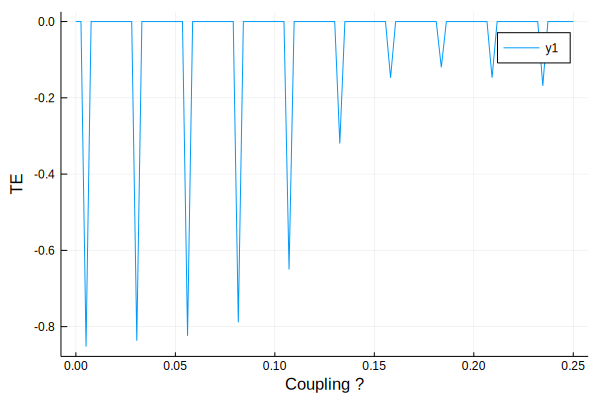

In [15]:
plot(couplings, mean_TE_yx)
xlabel!("Coupling ϵ")
ylabel!("TE")

In [74]:
#root2 = "/Users/andreu/Desktop/Dropbox/transfer_inormation_prague/code/correlations_TE"
root2 = "../data/exp_pro/correlations_TE"
maxτ = 50
jumpτ = 5
aux = LinRange(jumpτ, maxτ, 10)
τ_range = round.(Int64, aux)
println(τ_range)
#τs = (0,  10, 5, 0, maxτ)
#js = (2, 1, 1, 1, 1)
#js = (1, 2, 2, 2, 2)

τs = (0, 0,  maxτ ) #RIGhT ORDER FOR THE 3 dimensional embbeding case
#js = (2, 1, 1)
js = (1, 2, 2)

aux = '_'
for (i, e) in enumerate(τs)
    aux = string(τs[length(τs)-i+1],aux,js[i])
end
name = "couplings_meanTE_Knn$RecBin-$aux.txt"

open("$root2/$name", "w") do f
    @suppress_err begin
        for i in 1:size(test_couplings, 3)-1
            mean_TE = 0
            a = test_couplings[:,:,i]
            x = a[:,1]
            y = a[:,2]
            for t in τ_range
                print(t)
                ts =  changevector!(τs, t, length(τs))
                joint = DelayEmbeddings.genembed(Dataset(x, y),  ts, js )
                #e = tranfserentropy(joint, VisitationFrequency(b), α = 1.0, base = 2)
                #e = tranfserentropy(joint, VisitationFrequency(b); embdim = 5, α =1.0, base =2)
                e = tranfserentropy(joint, KozachenkoLeonenko(1,8),  2)
                mean_TE += e/length(τ_range)  
            end
            aux = couplings[i]
            println(couplings[i], ' ', mean_TE)
            write(f, "$aux $mean_TE\n")
        end
    end
end

[5, 10, 15, 20, 25, 30, 35, 40, 45, 50]
5  uh 

LoadError: BoundsError: attempt to access (-13.45701, 2.652757, -3.878211)
  at index [5]

In [169]:
aux = LinRange(jumpτ, maxτ, 10)
τ_range = round.(Int64, aux)

10-element Array{Int64,1}:
  3
  6
  9
 12
 15
 18
 21
 24
 27
 30

In [137]:
τ_range = LinRange(1, 10, 10)
EE = Array{Float64}(undef,  length(τ_range), 1)
for t in τ_range
    EE[1] += t/length(τ_range) #+ EE[1] 
end
EE[1]

5.5

?DelayEmbeddings.genembed

test_couplings[1,2,1]

In [30]:

a1 = test_couplings[:,:,1]
x1 = a1[:,1]
y1 = a1[:,2]

In [32]:
joint= DelayEmbeddings.genembed(Dataset(x1, y1),  (0,0,1), (1,2,2) );

?Entropies.genentropy